# Wholesale Customers Analysis (Download Data)

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Wholesale+Customers+Data.csv')

In [4]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [5]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [6]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

Summarized data

In [7]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [8]:
print(df.describe(include=['object']))

       Channel Region
count      440    440
unique       2      3
top      Hotel  Other
freq       298    316


In [9]:
print (df. describe(include='all'))

        Buyer/Spender Channel Region     Fresh     Milk  Grocery   Frozen  \
count          440.00     440    440    440.00   440.00   440.00   440.00   
unique            nan       2      3       nan      nan      nan      nan   
top               nan   Hotel  Other       nan      nan      nan      nan   
freq              nan     298    316       nan      nan      nan      nan   
mean           220.50     NaN    NaN  12000.30  5796.27  7951.28  3071.93   
std            127.16     NaN    NaN  12647.33  7380.38  9503.16  4854.67   
min              1.00     NaN    NaN      3.00    55.00     3.00    25.00   
25%            110.75     NaN    NaN   3127.75  1533.00  2153.00   742.25   
50%            220.50     NaN    NaN   8504.00  3627.00  4755.50  1526.00   
75%            330.25     NaN    NaN  16933.75  7190.25 10655.75  3554.25   
max            440.00     NaN    NaN 112151.00 73498.00 92780.00 60869.00   

        Detergents_Paper  Delicatessen  
count             440.00        44

.............................................................




Which Region and which Channel spent the most? 

Which Region and which Channel spent the least?

In [10]:
df_spending = df.copy()
df_spending['spending'] = df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']


In [11]:
df_spending

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: spending, dtype: int64



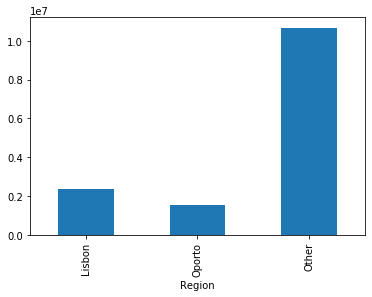

None


In [12]:
df_region = df_spending.groupby('Region')["spending"].sum()
print(df_region)
print()
df_region.plot(kind='bar')
print(plt.show())


Channel
Hotel     7999569
Retail    6619931
Name: spending, dtype: int64



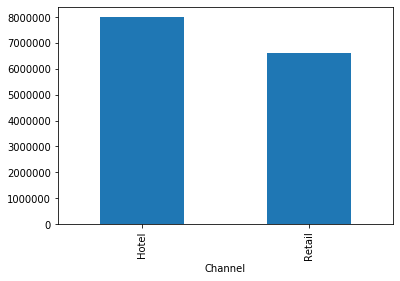

None


In [13]:
df_channel = df_spending.groupby('Channel')["spending"].sum()
print(df_channel)
print()
df_channel.plot(kind='bar')
print(plt.show())


# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

For Fresh

Region
Lisbon     854833
Oporto     464721
Other     3960577
Name: Fresh, dtype: int64
Text(0.5, 1.0, 'Graph for Fresh / Region')

Channel
Hotel     4015717
Retail    1264414
Name: Fresh, dtype: int64

Text(0.5, 1.0, 'Graph for Fresh / Channel')


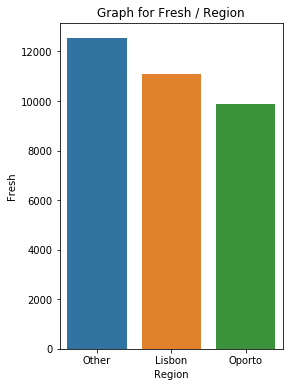

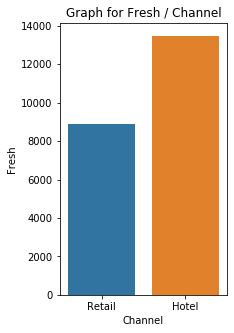

In [14]:
print('For Fresh')
print()
df_Fresh_region = df_spending.groupby('Region')["Fresh"].sum()
print(df_Fresh_region)
plt.figure(figsize=(4,6)) 
sns.barplot(x="Region", y="Fresh", ci=None, data=df)
print(plt.title('Graph for Fresh / Region'));
print()
df_Fresh_Channel = df_spending.groupby('Channel')["Fresh"].sum()
print(df_Fresh_Channel)
print()
plt.figure(figsize=(3,5)) 
sns.barplot(x="Channel", y="Fresh", ci=None, data=df)
print(plt.title('Graph for Fresh / Channel'));

In [15]:
print('Comments')
print()
print('The Fresh is highest spended in the region of "Other" ')
print('The Fresh is lowest spended in the region of "Oporto "')
print('The Fresh is highest spended in the Channel of "Hotel"')
print('The Fresh is lowest spended in the Channel of "Retail"')

Comments

The Fresh is highest spended in the region of "Other" 
The Fresh is lowest spended in the region of "Oporto "
The Fresh is highest spended in the Channel of "Hotel"
The Fresh is lowest spended in the Channel of "Retail"


For Milk

Region
Lisbon     422454
Oporto     239144
Other     1888759
Name: Milk, dtype: int64
Text(0.5, 1.0, 'Graph for Milk / Region')

Channel
Hotel     1028614
Retail    1521743
Name: Milk, dtype: int64

Text(0.5, 1.0, 'Graph for Milk / Channel')


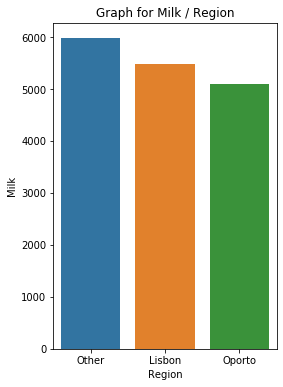

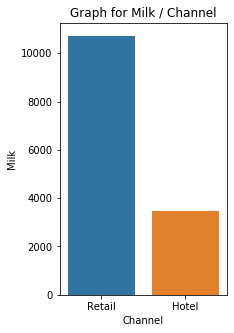

In [16]:
print('For Milk')
print()
df_milk_region = df_spending.groupby('Region')["Milk"].sum()
print(df_milk_region)
plt.figure(figsize=(4,6)) 
sns.barplot(x="Region", y="Milk", ci=None, data=df)
print(plt.title('Graph for Milk / Region'));
print()
df_milk_Channel = df_spending.groupby('Channel')["Milk"].sum()
print(df_milk_Channel)
print()
plt.figure(figsize=(3,5)) 
sns.barplot(x="Channel", y="Milk", ci=None, data=df)
print(plt.title('Graph for Milk / Channel'));



In [17]:
print('Comments')
print()
print('The Milk  is highest spent in the region of "Other" ')
print('The Milk  is lowest spent in the region of "Oporto "')
print('The Milk  is highest spent in the Channel of "Retail"')
print('The Milk is lowest spent in the Channel of "Hotel "')

Comments

The Milk  is highest spent in the region of "Other" 
The Milk  is lowest spent in the region of "Oporto "
The Milk  is highest spent in the Channel of "Retail"
The Milk is lowest spent in the Channel of "Hotel "


For Grocery

Region
Lisbon     570037
Oporto     433274
Other     2495251
Name: Grocery, dtype: int64
Text(0.5, 1.0, 'Graph for Grocery / Region')

Channel
Hotel     1180717
Retail    2317845
Name: Grocery, dtype: int64

Text(0.5, 1.0, 'Graph for Grocery / Channel')


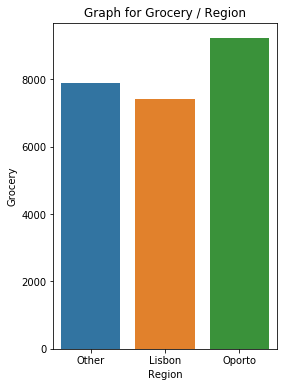

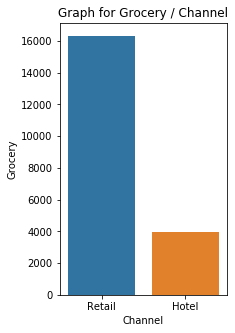

In [18]:
print('For Grocery')
print()
df_Grocery_region = df_spending.groupby('Region')["Grocery"].sum()
print(df_Grocery_region)
plt.figure(figsize=(4,6)) 
sns.barplot(x="Region", y="Grocery", ci=None, data=df)
print(plt.title('Graph for Grocery / Region'));
print()
df_Grocery_Channel = df_spending.groupby('Channel')["Grocery"].sum()
print(df_Grocery_Channel)
print()
plt.figure(figsize=(3,5)) 
sns.barplot(x="Channel", y="Grocery", ci=None, data=df)
print(plt.title('Graph for Grocery / Channel'));


In [19]:
print('Comments')
print()
print('The Grocery  is highest spended in the region of "Other" ')
print('The Grocery is lowest spended in the region of "Oporto "')
print('The Grocery  is highest spended in the Channel of "Retail"')
print('The Grocery  is lowest spended in the Channel of "Hotel "')

Comments

The Grocery  is highest spended in the region of "Other" 
The Grocery is lowest spended in the region of "Oporto "
The Grocery  is highest spended in the Channel of "Retail"
The Grocery  is lowest spended in the Channel of "Hotel "


Frozen

Region
Lisbon    231026
Oporto    190132
Other     930492
Name: Frozen, dtype: int64
Text(0.5, 1.0, 'Graph for Frozen / Region')

Channel
Hotel     1116979
Retail     234671
Name: Frozen, dtype: int64

Text(0.5, 1.0, 'Graph for Frozen / Channel')


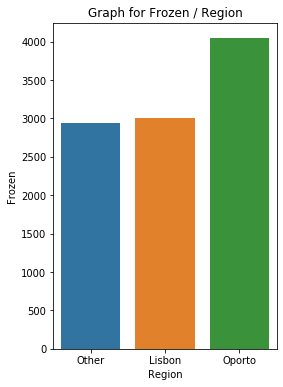

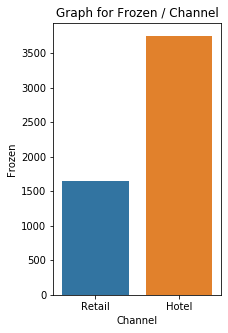

In [20]:
print('Frozen')
print()
df_Frozen_region = df_spending.groupby('Region')["Frozen"].sum()
print(df_Frozen_region)
plt.figure(figsize=(4,6)) 
sns.barplot(x="Region", y="Frozen", ci=None, data=df)
print(plt.title('Graph for Frozen / Region'));
print()
df_Frozen_Channel = df_spending.groupby('Channel')["Frozen"].sum()
print(df_Frozen_Channel)
print()
plt.figure(figsize=(3,5)) 
sns.barplot(x="Channel", y="Frozen", ci=None, data=df)
print(plt.title('Graph for Frozen / Channel'));

In [21]:
print('Comments')
print()
print('The Frozen  is highest spended in the region of "Oporto" ')
print('The Frozen is lowest spended in the region of " Others"')
print('The Frozen  is highest spended in the Channel of "Hotel"')
print('The Frozen  is lowest spended in the Channel of "Retail "')

Comments

The Frozen  is highest spended in the region of "Oporto" 
The Frozen is lowest spended in the region of " Others"
The Frozen  is highest spended in the Channel of "Hotel"
The Frozen  is lowest spended in the Channel of "Retail "


Detergents_Paper

Region
Lisbon    204136
Oporto    173311
Other     890410
Name: Detergents_Paper, dtype: int64
Text(0.5, 1.0, 'Graph for Detergents_Paper / Region')

Channel
Hotel      235587
Retail    1032270
Name: Detergents_Paper, dtype: int64

Text(0.5, 1.0, 'Graph for Detergents_Paper / Channel')


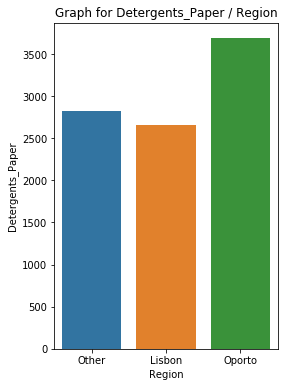

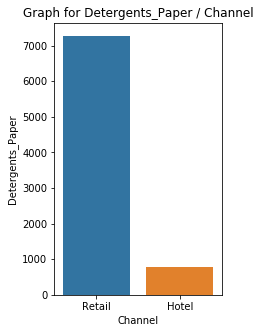

In [22]:
print('Detergents_Paper')
print()
df_Detergents_Paper_region = df_spending.groupby('Region')["Detergents_Paper"].sum()
print(df_Detergents_Paper_region)
plt.figure(figsize=(4,6)) 
sns.barplot(x="Region", y="Detergents_Paper", ci=None, data=df)
print(plt.title('Graph for Detergents_Paper / Region'));
print()
df_Detergents_Paper_Channel = df_spending.groupby('Channel')["Detergents_Paper"].sum()
print(df_Detergents_Paper_Channel)
print()
plt.figure(figsize=(3,5)) 
sns.barplot(x="Channel", y="Detergents_Paper", ci=None, data=df)
print(plt.title('Graph for Detergents_Paper / Channel'));

In [23]:
print('Comments')
print()
print('The Detergents_Paper  is highest spended in the region of "Oporto" ')
print('The Detergents_Paper is lowest spended in the region of " Lisbon"')
print('The Detergents_Paper  is highest spended in the Channel of "Retail"')
print('The Detergents_Paper  is lowest spended in the Channel of "Hotel"')

Comments

The Detergents_Paper  is highest spended in the region of "Oporto" 
The Detergents_Paper is lowest spended in the region of " Lisbon"
The Detergents_Paper  is highest spended in the Channel of "Retail"
The Detergents_Paper  is lowest spended in the Channel of "Hotel"


Delicatessen

Region
Lisbon    104327
Oporto     54506
Other     512110
Name: Delicatessen, dtype: int64
Text(0.5, 1.0, 'Graph for Delicatessen/ Region')

Channel
Hotel     421955
Retail    248988
Name: Delicatessen, dtype: int64

Text(0.5, 1.0, 'Graph for Delicatessen / Channel')


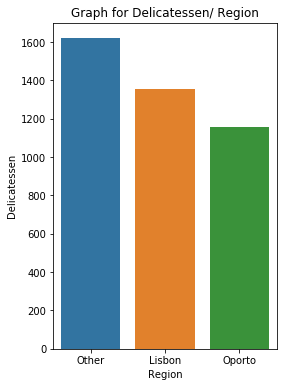

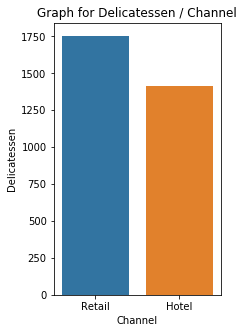

In [24]:
print('Delicatessen')
print()
df_Delicatessen_region = df_spending.groupby('Region')["Delicatessen"].sum()
print(df_Delicatessen_region)
plt.figure(figsize=(4,6)) 
sns.barplot(x="Region", y="Delicatessen", ci=None, data=df)
print(plt.title('Graph for Delicatessen/ Region'));
print()
df_Delicatessen_Channel = df_spending.groupby('Channel')["Delicatessen"].sum()
print(df_Delicatessen_Channel)
print()
plt.figure(figsize=(3,5)) 
sns.barplot(x="Channel", y="Delicatessen", ci=None, data=df)
print(plt.title('Graph for Delicatessen / Channel'));

In [25]:
print('Comments')
print()
print('The Delicatessen  is highest spended in the region of "Others" ')
print('The Delicatessen is lowest spended in the region of " Oporto"')
print('The Delicatessen  is highest spended in the Channel of "Retail"')
print('The Delicatessen  is lowest spended in the Channel of "Hotel"')

Comments

The Delicatessen  is highest spended in the region of "Others" 
The Delicatessen is lowest spended in the region of " Oporto"
The Delicatessen  is highest spended in the Channel of "Retail"
The Delicatessen  is lowest spended in the Channel of "Hotel"


# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [26]:
df_products = df[["Fresh", "Milk","Grocery","Frozen", "Detergents_Paper","Delicatessen"]]
df_products_des = df_products.describe()
df_products_des.loc[('Total'), :] = df_products.sum()

In [27]:
df_products_des.loc[('CV'), :] = df_products_des.loc[('std'), :]/df_products_des.loc[('mean'), :]
df_products_des

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00
Total,5280131.00,2550357.00,3498562.00,1351650.00,1267857.00,670943.00
CV,1.05,1.27,1.20,1.58,1.65,1.85


From the above table, we can say that, 'Frozen' iteams show the highest inconsistent behavior in as the coefficient of variation is the high for it. On the other hand, 'Fresh' show the most consistent behavior  as the CV is the lowest.

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

In [28]:
df_products_outliner = df[["Fresh", "Milk","Grocery","Frozen", "Detergents_Paper","Delicatessen"]]
df_products_outliner

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


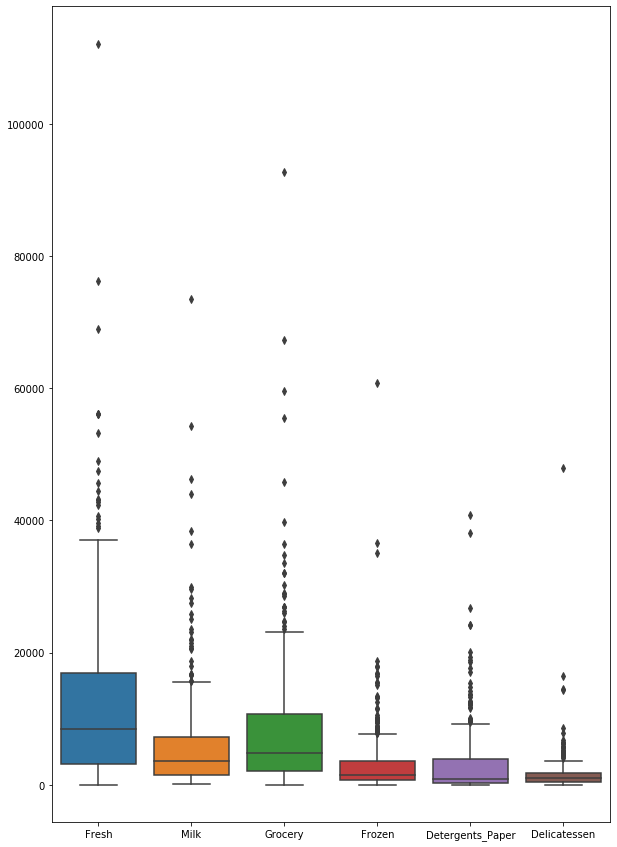

In [29]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df_products);

Box plot is the best pictorial presentation to show the outliers. All products have outliers.

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

# Problem 2

# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).


In [30]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('Survey-1.csv')

In [32]:
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.40,Part-Time,40.00,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.90,Part-Time,40.00,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.50,Part-Time,55.00,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.50,Part-Time,30.00,2,3,490,Laptop,50


In [33]:
df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

In [34]:
pd.crosstab(df['Gender'], df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


2.1.2. Gender and Grad Intention

In [35]:
pd.crosstab(df['Gender'], df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


2.1.3. Gender and Employment

In [36]:
pd.crosstab(df['Gender'], df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


2.1.4. Gender and Computer

In [37]:
pd.crosstab(df['Gender'], df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [38]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [39]:
print('Probability that a randomly selected CMSU student will be male:',33/len(df['Gender']))

Probability that a randomly selected CMSU student will be male: 0.532258064516129


# 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [40]:
print('Probability that a randomly selected CMSU student will be female:',29/len(df['Gender']))

Probability that a randomly selected CMSU student will be female: 0.46774193548387094


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.¶

In [41]:
pd.crosstab(df['Gender'], df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [42]:
Total_males = (4+1+4+2+6+4+5+3)
Total_males

29

In [43]:
print('Conditional probability of Accounting:', 4/29 )
print('Conditional probability of CIS:', 1/29 )
print('Conditional probability of Economics/Finance:', 4/29)
print('Conditional probability of International Business:', 2/29 )
print('Conditional probability of Management:', 6/29 )
print('Conditional probability of Other:', 4/29 )
print('Conditional probability of Retailing/Marketing:', 5/29 )
print('Conditional probability of Undecided:', 3/29 )

Conditional probability of Accounting: 0.13793103448275862
Conditional probability of CIS: 0.034482758620689655
Conditional probability of Economics/Finance: 0.13793103448275862
Conditional probability of International Business: 0.06896551724137931
Conditional probability of Management: 0.20689655172413793
Conditional probability of Other: 0.13793103448275862
Conditional probability of Retailing/Marketing: 0.1724137931034483
Conditional probability of Undecided: 0.10344827586206896


# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [44]:
pd.crosstab(df['Gender'], df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [45]:
Total_female = (3+3+7+4+4+3+9+0)
Total_female

33

In [46]:
print('Conditional probability of Accounting:', 3/33 )
print('Conditional probability of CIS:', 3/33 )
print('Conditional probability of Economics/Finance:', 7/33)
print('Conditional probability of International Business:', 4/33 )
print('Conditional probability of Management:', 4/33 )
print('Conditional probability of Other:', 3/33 )
print('Conditional probability of Retailing/Marketing:', 9/33 )
print('Conditional probability of Undecided:', 0/33 )

Conditional probability of Accounting: 0.09090909090909091
Conditional probability of CIS: 0.09090909090909091
Conditional probability of Economics/Finance: 0.21212121212121213
Conditional probability of International Business: 0.12121212121212122
Conditional probability of Management: 0.12121212121212122
Conditional probability of Other: 0.09090909090909091
Conditional probability of Retailing/Marketing: 0.2727272727272727
Conditional probability of Undecided: 0.0


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [47]:
pd.crosstab(df['Gender'],df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [48]:
print("P(Graduate ∩ Male) = P (Graduate| Male) x P (male) = ",(17/29) * (29/62))

P(Graduate ∩ Male) = P (Graduate| Male) x P (male) =  0.27419354838709675


# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [49]:
pd.crosstab(df['Gender'],df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [50]:
print("P(Graduate ∩ female) = P (Graduate| female) x P (female) = ",(4/33) * (33/62))

P(Graduate ∩ female) = P (Graduate| female) x P (female) =  0.06451612903225806


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

P(A U B) = P(A)+P(B)

In [51]:
pd.crosstab(df['Gender'],df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [52]:
print('The probability of being male is',29/62)
print('The probability of being Full-time is',7/(7+19+3))

The probability of being male is 0.46774193548387094
The probability of being Full-time is 0.2413793103448276


In [53]:
print('probability of being male or being full-time employee=', 0.46774193548387094+0.2413793103448276)

probability of being male or being full-time employee= 0.7091212458286985


# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [54]:
print('P(A U B) = P(A)+P(B)')

P(A U B) = P(A)+P(B)


In [55]:
pd.crosstab(df['Gender'], df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [56]:
print('The probability of being female in International Business is',4/32)
print('The probability of being female in Management is',4/32)

The probability of being female in International Business is 0.125
The probability of being female in Management is 0.125


In [57]:
print('The probalility female student majoring in international business or management=',0.125+0.125)

The probalility female student majoring in international business or management= 0.25


# 2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?¶

In [58]:
pd.crosstab(df['Gender'], df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [59]:
df_drop_undecided = pd.crosstab(df['Gender'], df['Grad Intention'])

In [60]:
df_drop_undecided_result = df_drop_undecided[["No", "Yes"]]
df_drop_undecided_result

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


.......................................................................................................

The graduate intention and being female are independent events?

For 2 events to be independent, following condition is to be satified

P(A ∩ B) = P(A) * P(B)

So, P (Graduate intention ∩ Female) = P(Graduate intention) * P(Female)

In [61]:
print('P(Female) =',32/40)

print('P(Graduate intention) =', 28/40 )

P(Female) = 0.8
P(Graduate intention) = 0.7


In [62]:
print('P(Graduate intention) * P(Female) =',0.8*0.7)

print('P(Graduate intention ∩ Female) =', 11/40)

P(Graduate intention) * P(Female) = 0.5599999999999999
P(Graduate intention ∩ Female) = 0.275


In [63]:
print('This is not independent events as probability multiplication of both events is not equal to combined event, so being a winner and being female candidate are not independent events')

This is not independent events as probability multiplication of both events is not equal to combined event, so being a winner and being female candidate are not independent events


# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
Answer the following questions based on the data

# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?¶

# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

Normality distribuation test GPA




Chi2=1.95, pvalue=0.377


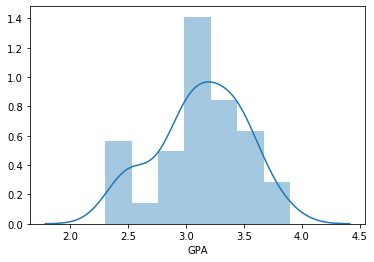

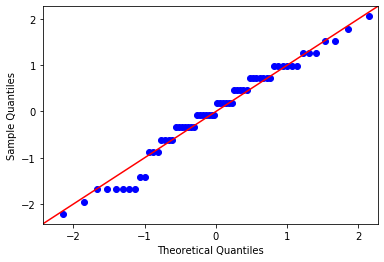

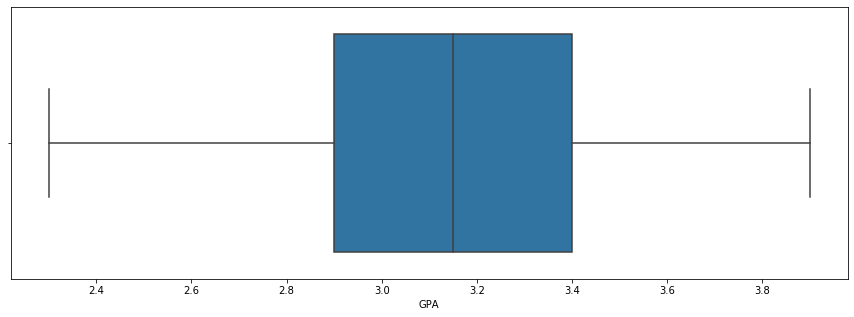

In [64]:
print('Normality distribuation test GPA')
print()
#Through Histogram graph
sns.distplot(df['GPA'], hist=True);
print()
#statsmodels graphics
import statsmodels.api as sm
plot=sm.qqplot(df['GPA'], line='45', fit=True);
print()
#Through box plot
plt.figure(figsize=(15,5))
sns.boxplot(x="GPA", data=df);
print()
import statsmodels.api as sm
from scipy import stats
chi2, p=stats.normaltest(df['GPA'])
print('Chi2=%.2f, pvalue=%.3f' % (chi2, p))

Normality distribuation test Salary




Chi2=3.85, pvalue=0.146


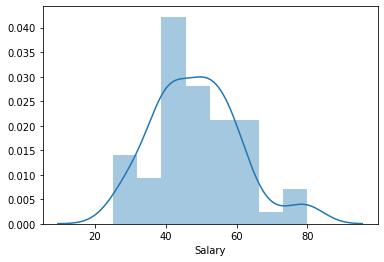

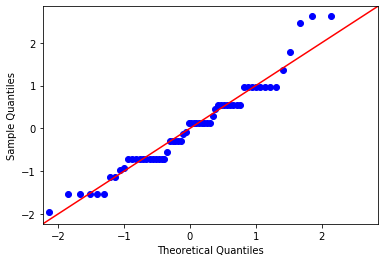

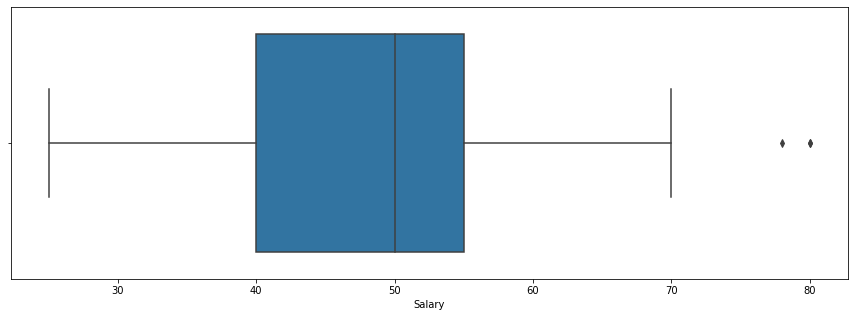

In [65]:
print('Normality distribuation test Salary')
print()
#Through Histogram graph
sns.distplot(df['Salary'], hist=True);
print()
#statsmodels graphics
plot=sm.qqplot(df['Salary'], line='45', fit=True);
print()
#Through box plot
plt.figure(figsize=(15,5))
sns.boxplot(x="Salary", data=df);
print()
chi2, p=stats.normaltest(df['Salary'])
print('Chi2=%.2f, pvalue=%.3f' % (chi2, p))

Normality distribuation test Spending




Chi2=30.50, pvalue=0.000


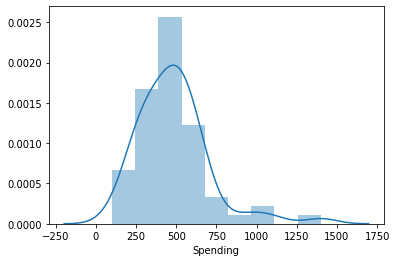

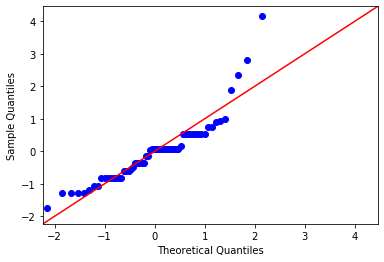

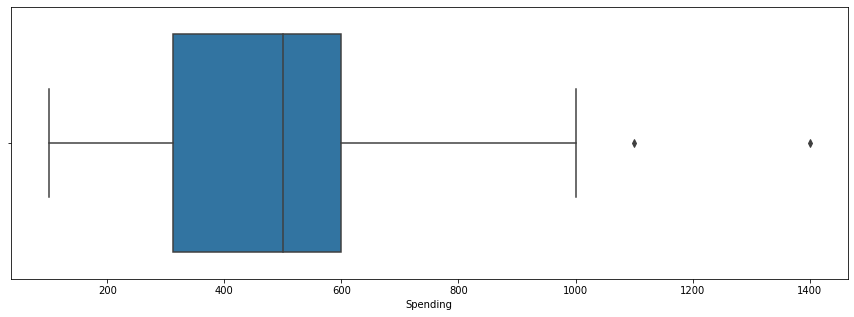

In [66]:
print('Normality distribuation test Spending')
print()
#Through Histogram graph
sns.distplot(df['Spending'], hist=True);
print()
#statsmodels graphics
plot=sm.qqplot(df['Spending'], line='45', fit=True);
print()
#Through box plot
plt.figure(figsize=(15,5))
sns.boxplot(x="Spending", data=df);
print()
chi2, p=stats.normaltest(df['Spending'])
print('Chi2=%.2f, pvalue=%.3f' % (chi2, p))




Normality distribuation test Text Messages




Chi2=16.35, pvalue=0.000


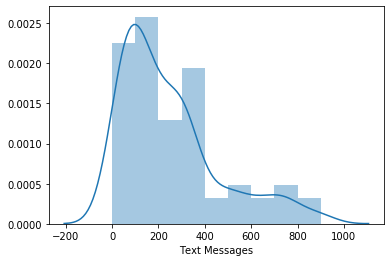

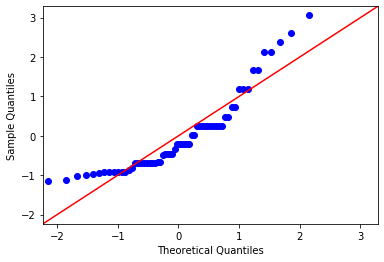

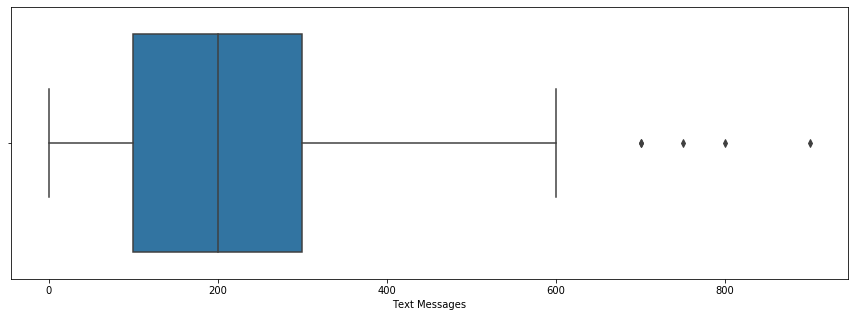

In [67]:
print('Normality distribuation test Text Messages')
print()
#Through Histogram graph
sns.distplot(df['Text Messages'], hist=True);
print()
#statsmodels graphics
plot=sm.qqplot(df['Text Messages'], line='45', fit=True);
print()
#Through box plot
plt.figure(figsize=(15,5))
sns.boxplot(x="Text Messages", data=df);
print()
chi2, p=stats.normaltest(df['Text Messages'])
print('Chi2=%.2f, pvalue=%.3f' % (chi2, p))

# Problem 3

# An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging. In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [68]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import   ttest_1samp

In [69]:
df = pd.read_csv('A+&+B+shingles.csv')

In [70]:
df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [71]:
df.describe()

,A,B
count,36.00,31.00
mean,0.32,0.27
std,0.14,0.14
min,0.13,0.10
25%,0.21,0.16
50%,0.29,0.23
75%,0.39,0.40
max,0.72,0.58


In [72]:
df.isnull().sum()

A    0
B    5
dtype: int64

# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

# 1 sample T test for shingles 'A'

In [73]:
df_a = df['A'].T
df_a

0    0.44
1    0.61
2    0.47
3    0.30
4    0.15
5    0.24
6    0.16
7    0.20
8    0.20
9    0.20
10   0.26
11   0.14
12   0.33
13   0.13
14   0.72
15   0.51
16   0.28
17   0.39
18   0.39
19   0.25
20   0.16
21   0.20
22   0.22
23   0.42
24   0.24
25   0.21
26   0.49
27   0.34
28   0.36
29   0.29
30   0.27
31   0.40
32   0.29
33   0.43
34   0.34
35   0.37
Name: A, dtype: float64

Decide the significance level
Here we select α = 0.05.


In [74]:
print("The sample size for this problem is",len(df_a))

The sample size for this problem is 36


In [75]:
# null hypothesis: mean moisture content <=0.35
t_statistic, p_value = ttest_1samp(df_a, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.14955266289815025 


In [76]:
#alternative hypothesis: mean moisture content > 0.35
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

NameError: name 'alpha_value' is not defined

In this example, p value is 0.149 and it is greater than 5% level of significance

So the statistical decision is failing to reject the null hypothesis at 5% level of significance.

So at 95% confidence level, there is sufficient evidence to prove that mean moisture present in the Single A is lesser or equal to 0.35 pounds per 100 square feet.¶

# 1 sample T test for shingles 'B'

In [ ]:
df_b = df['B'].T
df_a

In [ ]:
print("The sample size for this problem is",len(df_b))

In [ ]:
# null hypothesis: mean moisture content <=0.35
t_statistic, p_value = ttest_1samp(df_b, 0.35,nan_policy='omit')
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

In [ ]:
#alternative hypothesis: mean moisture content > 0.35
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

In this example, p value is 0.149 and it is lesser than 5% level of significance

So the statistical decision is failing to able the null hypothesis at 5% level of significance.

So at 95% confidence level, there is sufficient evidence to prove that mean moisture present in the Single B is greater 0.35 pounds per 100 square feet.¶

# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

To calculate the p - value and test statistic, we use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.

In [ ]:
#population mean for shingles A and = population mean for shingles
from   scipy.stats  import ttest_1samp, ttest_ind
t_statistic, p_value  = ttest_ind(df['A'],df['B'],equal_var=True,nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)  

In [ ]:
t_statistic, p_value 

In [ ]:
#population mean for shingles A and != population mean for shingles

print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population mean for shingles A and B not equal.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that mean population mean for shingles A and B equal.')

In this example, p value is 2.2017 and it is grater than 5% level of significance

So the statistical decision is failing to able the null hypothesis at 5% level of significance.

So at 95% confidence level, there is sufficient evidence to prove that mean moisture present in the Single A is equal to Single B